# General scrip to invert the problem of Neutrino Physics

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

# PMNS matrix 2018 to $3\sigma$ https://arxiv.org/abs/1708.01186

In [4]:
import NEUTRINO2018
import neutrino_analytic2

In [4]:
mnu1 = NEUTRINO2018.nuexpvalues()['mnu1']
mnu2 = NEUTRINO2018.nuexpvalues()['mnu2']
mnu3 = NEUTRINO2018.nuexpvalues()['mnu3']
U11 = NEUTRINO2018.nuexpvalues()['U11']
U12 = NEUTRINO2018.nuexpvalues()['U12']
U13 = NEUTRINO2018.nuexpvalues()['U13']
U21 = NEUTRINO2018.nuexpvalues()['U21']
U22 = NEUTRINO2018.nuexpvalues()['U22']
U23 = NEUTRINO2018.nuexpvalues()['U23']
U31 = NEUTRINO2018.nuexpvalues()['U31']
U32 = NEUTRINO2018.nuexpvalues()['U32']
U33 = NEUTRINO2018.nuexpvalues()['U33']

print(U22,U23)
print(mnu1,mnu2,mnu3)
print("SUM=",mnu1+mnu2+mnu3)

0.5091245684155457 0.7247428606623215
1e-20 8.544640314716886e-12 4.920851454658966e-11
SUM= 5.775315487130654e-11


WARNING in NEUTRINO2018.nuexpvalues rutine

In [81]:
#!/usr/bin/env python

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 3

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    vevSM = 244.874425
    MDF = 400.
    MS12 = 8.0E+06
    MS22 = 9.0E+06
    LamS1H = 0.0E-04
    LamS2H = 0.0E-04
    LamSPH = 0.0E-04
    LamS = 1.0E-04
    LamSP = 2.0E-01    
    vS = 500.
    YRD = 1.0E-03
    YRC = 5.0E-02
    
    #Algoritm to compute LAMBDAi
    MS1 = np.sqrt(LamS1H*vevSM**2/2.+MS12)
    MS2 = np.sqrt(LamS2H*vevSM**2/2.+MS22)
    M1 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M1']
    M2 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M2']
    vv12 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V12']
    vv22 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V22']
    uu11 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U11']
    uu21 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U21']
    L1 = neutrino_analytic2.LAMBDA(M1,MS1,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS1,vv22,uu21)
    L2 = neutrino_analytic2.LAMBDA(M1,MS2,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS2,vv22,uu21)
    
        
    #Neutrino experimental values to 3sigma -> WARNING!!!!
    mnu1 = NEUTRINO2018.nuexpvalues()['mnu1']
    mnu2 = NEUTRINO2018.nuexpvalues()['mnu2']
    mnu3 = NEUTRINO2018.nuexpvalues()['mnu3']    
    U11 = NEUTRINO2018.nuexpvalues()['U11']
    U12 = NEUTRINO2018.nuexpvalues()['U12']
    U13 = NEUTRINO2018.nuexpvalues()['U13']
    U21 = NEUTRINO2018.nuexpvalues()['U21']
    U22 = NEUTRINO2018.nuexpvalues()['U22']
    U23 = NEUTRINO2018.nuexpvalues()['U23']
    U31 = NEUTRINO2018.nuexpvalues()['U31']
    U32 = NEUTRINO2018.nuexpvalues()['U32']
    U33 = NEUTRINO2018.nuexpvalues()['U33']
    
    #ALGORITM: Particular case(see): inversion-neutrino-matrix.nb
    a11 = 0.0
    a12 = 0.0 
    #Random
    a21 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a22 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a31 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))    
    a32 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    #Solved in Mathematica
    b11 = -((a32*mnu2*U12 - a22*mnu3*U13)/(a22*a31*L1 - a21*a32*L1))   
    b21 = -((a32*mnu2*U22 - a22*mnu3*U23)/(a22*a31*L1 - a21*a32*L1))
    b31 = -((a32*mnu2*U32 - a22*mnu3*U33)/(a22*a31*L1 - a21*a32*L1))
    b12 = (a31*mnu2*U12 - a21*mnu3*U13)/(a22*a31*L2 - a21*a32*L2)
    b22 = (a31*mnu2*U22 - a21*mnu3*U23)/(a22*a31*L2 - a21*a32*L2)
    b32 = (a31*mnu2*U32 - a21*mnu3*U33)/(a22*a31*L2 - a21*a32*L2)
    
    # Modific the LesHouches file   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    # Add to the LesHouches file 
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %a11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %a21    
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %a31 
    
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %a12  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %a22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %a32     
    
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %b11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %b21     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %b31 
        
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %b12  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %b22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %b32      
    
    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')

    ###  Run micromegas and take the relic density. 
    #mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega')
    mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega_with_DI_Detection') #Full
    
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    print("n=",n,"Omega=",Omega)
    
    # Choose Omega at to 3 sigma
    '''if Omega > 0.12800:
        continue
    if Omega < 0.11180:
        continue'''
    #print(Omega)
    
    ### Direct Detection: CDM-nucleon cross sections[pb]
    PSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[2])
    PSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[4])
    NSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[7])
    NSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[9])
    ### Indirect Detection: annihilation cross section vcs[cm^3/s]
    sv = eval(mo.split('annihilation cross section')[1].split()[0])    
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])

    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])
    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])
    vevSM = eval(SPheno_output.split('Block HMIX')[1].split()[6])

    ### EWPO
    T = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[5])
    S = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[11])
    U = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[17])
    ### LFV
    mueg = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[6])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,a11,a21,a31,a12,a22,a32,\
              b11,b21,b31,b12,b22,b32,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,vevSM,Omega,PSI,PSD,NSI,NSD,T,S,U,mueg])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13'\
                           ,'YRB21','YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha'\
                           ,'mChi1','mChi2','XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22','vevSM'\
                          ,'Omega','PSI','PSD','NSI','NSD','T','S','U','mueg'])
#xd.to_csv('xd_scan3.csv')

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")   

n= 2 Omega= 7780000.0
The program spent 3.550767183303833 s running 3 times


# Good one

In [79]:
#!/usr/bin/env python

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 3

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    vevSM = 244.874425
    MDF = np.exp(np.random.uniform(np.log(10**(2)),np.log(10**(3))))
    MS12 = 8.0E+06
    MS22 = 9.0E+06
    LamS1H = 0.0E-04
    LamS2H = 0.0E-04
    LamSPH = 0.0E-04
    LamS = 1.0E-04     
    LamSP = 1.0E-01    #ms ~ sqrt(2*lambdaS)*vs -> bigg, i.e. mh2 heavier
    vS = np.exp(np.random.uniform(np.log(np.sqrt(2)*10**(1)),np.log(np.sqrt(2)*10**(4))))
    YRD = 1.0E-01
    YRC = 1.0E-01
    
    ###  NEUTRINO EXPERIMENTAL VALUES ###################################################
    #phases of the PMNS matrix and the R 
    phases1 = np.random.uniform(0.,0.0*np.pi,3) # WARNING! They are in zero
    delta = phases1[0]
    eta1 = phases1[1]
    eta2 = phases1[2]
    #light neutrino masses (up 3 sigma range) NH (NO)
    #mnu1 = 10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9 
    #Zero in this framework
    mnu1 = 1.0e-20
    mnu2 = np.sqrt(np.random.uniform(7.05e-5,8.14e-5)*1.0e-18+mnu1**2)
    mnu3 = np.sqrt(np.random.uniform(2.41e-3,2.60e-3)*1.0e-18+mnu1**2)
    #mixing angles (up 3 sigma range) NH
    t12 = np.arcsin(np.sqrt(np.random.uniform(0.273,0.379)))
    t23 = np.arcsin(np.sqrt(np.random.uniform(0.445,0.599)))
    t13 = np.arcsin(np.sqrt(np.random.uniform(0.0196,0.0241)))
    #Building PMNS matrix NH
    UM12 = np.array([ [np.cos(t12),np.sin(t12),0.], [-np.sin(t12),np.cos(t12),0.], [0.,0.,1.0] ])
    UM13 = np.array([ [np.cos(t13),0.,np.sin(t13)], [0.,1.0,0.], [-np.sin(t13),0.,np.cos(t13)] ])
    UM23 = np.array([ [1.0,0.,0.], [0.,np.cos(t23),np.sin(t23)], [0.,-np.sin(t23),np.cos(t23)] ])
    Uphases = np.array([ [np.exp(eta1*1j),0.,0.], [0.,np.exp(eta2*1j),0.], [0.,0.,1.0] ])
    U=np.dot(UM23,np.dot(UM13,np.dot(UM12,Uphases)))
    #Defining the U elementes. readeable
    U11 = np.real(U[0,0])
    U12 = np.real(U[0,1])
    U13 = np.real(U[0,2])
    U21 = np.real(U[1,0])
    U22 = np.real(U[1,1])
    U23 = np.real(U[1,2])
    U31 = np.real(U[2,0])
    U32 = np.real(U[2,1])
    U33 = np.real(U[2,2])
    
    ### Algoritm to compute LAMBDAi elements
    MS1 = np.sqrt(LamS1H*vevSM**2/2.+MS12)
    MS2 = np.sqrt(LamS2H*vevSM**2/2.+MS22)
    M1 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M1']
    M2 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M2']
    vv12 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V12']
    vv22 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V22']
    uu11 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U11']
    uu21 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U21']
    L1 = neutrino_analytic2.LAMBDA(M1,MS1,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS1,vv22,uu21)
    L2 = neutrino_analytic2.LAMBDA(M1,MS2,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS2,vv22,uu21)
    
    #####  ALGORITM: Particular case(see): inversion-neutrino-matrix.nb ######################
    a11 = 0.0
    a12 = 0.0 
    ### Random -> FREE PARAMETERS
    a21 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a22 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a31 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))    
    a32 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    ### Solved in Mathematica
    b11 = -((a32*mnu2*U12 - a22*mnu3*U13)/(a22*a31*L1 - a21*a32*L1))   
    b21 = -((a32*mnu2*U22 - a22*mnu3*U23)/(a22*a31*L1 - a21*a32*L1))
    b31 = -((a32*mnu2*U32 - a22*mnu3*U33)/(a22*a31*L1 - a21*a32*L1))
    b12 = (a31*mnu2*U12 - a21*mnu3*U13)/(a22*a31*L2 - a21*a32*L2)
    b22 = (a31*mnu2*U22 - a21*mnu3*U23)/(a22*a31*L2 - a21*a32*L2)
    b32 = (a31*mnu2*U32 - a21*mnu3*U33)/(a22*a31*L2 - a21*a32*L2)
    
    ###  Modify the LesHouches file   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    ###  Modify the LesHouches file 
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %a11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %a21    
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %a31     
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %a12  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %a22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %a32        
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %b11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %b21     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %b31 
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %b12  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %b22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %b32      
    
    ###  Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    ### Run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    ###  Run micromegas and take the relic density. 
    #mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega')
    mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega_with_DI_Detection') #Full
    
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    print("n=",n,"Omega=",Omega)
    
    # Choose Omega at to 3 sigma
    '''if Omega > 0.12800:
        continue
    if Omega < 0.11180:
        continue'''
    #print(Omega)
    
    ### Direct Detection: CDM-nucleon cross sections[pb]
    PSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[2])
    PSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[4])
    NSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[7])
    NSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[9])
    ### Indirect Detection: annihilation cross section vcs[cm^3/s]
    sv = eval(mo.split('annihilation cross section')[1].split()[0])
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])
    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])
    vevSM = eval(SPheno_output.split('Block HMIX')[1].split()[6])
    
    ### EWPO
    T = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[5])
    S = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[11])
    U = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[17])
    ### LFV
    mueg = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[6])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,a11,a21,a31,a12,a22,a32,\
              b11,b21,b31,b12,b22,b32,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,vevSM,Omega,PSI,PSD,NSI,NSD,T,S,U,mueg])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13'\
                           ,'YRB21','YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha'\
                           ,'mChi1','mChi2','XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22','vevSM'\
                          ,'Omega','PSI','PSD','NSI','NSD','T','S','U','mueg'])
#xd.to_csv('xd_scan3.csv')

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

n= 0 Omega= 82.6
n= 1 Omega= 366.0
n= 2 Omega= 25.5
The program spent 5.223223924636841 s running 3 times


In [80]:
xd

,MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,...,vevSM,Omega,PSI,PSD,NSI,NSD,T,S,U,mueg
0,339.068294,8000000.0,9000000.0,0.0,0.0,0.0,0.0001,0.1,2116.827442,0.1,...,244.874425,82.6,1.035000e-09,1.049000e-07,4.141000e-08,8.021000e-08,-0.000010,0.000162,0.000694,0.0
1,264.498058,8000000.0,9000000.0,0.0,0.0,0.0,0.0001,0.1,195.458082,0.1,...,244.871286,366.0,6.993000e-10,1.640000e-07,3.010000e-08,1.254000e-07,0.038781,0.070298,-0.001055,0.0
2,153.207575,8000000.0,9000000.0,0.0,0.0,0.0,0.0001,0.1,252.372076,0.1,...,244.872268,25.5,6.716000e-09,1.505000e-06,2.882000e-07,1.151000e-06,0.028134,0.044925,0.002011,0.0


In [69]:
### EWPO
T = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[5])
S = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[11])
U = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[17])
### LFV
mueg = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[6])

In [77]:
mueg = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[6])

In [78]:
print(mueg)

0.0


In [12]:
xd[['YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13','YRB21','YRB22','YRB23','mChi1','Omega']][:3]

,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,mChi1,Omega
0,0.0,0.061429,0.000643,0.0,0.009899,0.000385,0.000002,0.000012,0.000011,-1.594615e-05,-8.176441e-05,-7.663051e-05,129.416323,5.08
1,0.0,0.003774,0.026732,0.0,0.000208,0.605588,-0.000003,-0.000003,0.000003,9.880860e-08,5.880462e-09,-2.780464e-07,21.470745,855.00


In [55]:
print("Experimental values   :",mnu2, mnu3)
print(" ")
print("Inversion-SPHENO      :",mv2,  mv3)

Experimental values   : 8.812362432509597e-12 4.9460234968788695e-11
 
Inversion-SPHENO      : 8.81235978e-12 4.94602153e-11


In [56]:
print("RUTINE: ",'%.5f' %M1, '%.5f' %M2)
#
print("SPEHENO:",'%.5f' %mChi1 , '%.5f' %mChi2)

RUTINE:  40.48622 713.72704
SPEHENO: 40.48622 713.72704


In [ ]:
'''
(xd.YRB11*L1*xd.YRA11+xd.YRB21*L2*xd.YRA21)+(xd.YRB12*L1*xd.YRA11+xd.YRB22*L2*xd.YRA21)\
+(xd.YRB13*L1*xd.YRA11+xd.YRB23*L2*xd.YRA21)
'''

# Analytical diagonalization rutine for Neutrino mass matriz

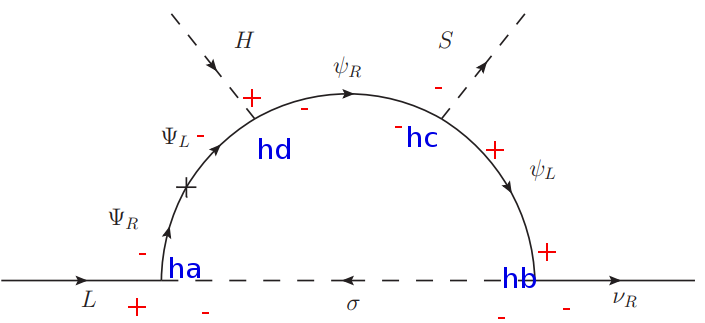

In [39]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=500)

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

Import the analytical rutine for compute the $\mathcal{M}_{\alpha\beta}$ version two

Example:

In [17]:
#Add to the DataFrame
xd['mn1'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[0]
xd['mn2'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[1]
xd['mn3'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[2]

In [18]:
##WARNING: The vev change in SPheno
xd[['mv1','mn1','mv2','mn2','mv3','mn3']][:3]

,mv1,mn1,mv2,mn2,mv3,mn3
0,2.873742e-19,4.336809e-19,8.880368e-12,8.880370e-12,5.093425e-11,5.093425e-11
1,3.911844e-19,4.336809e-19,8.573226e-12,8.573224e-12,5.080444e-11,5.080445e-11
2,3.440829e-19,0.000000e+00,8.700700e-12,8.700705e-12,4.956507e-11,4.956505e-11


# PLOTS

In [19]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [20]:
#Experimental values for DM: Planck results 2015
e = 3
Omega = 0.1197
Omega_max=Omega + e*0.0022
Omega_min=Omega - e*0.0022
print (Omega, Omega_min,Omega_max)
# out: (0.1197, 0.1131, 0.1263)

0.1197 0.1131 0.1263


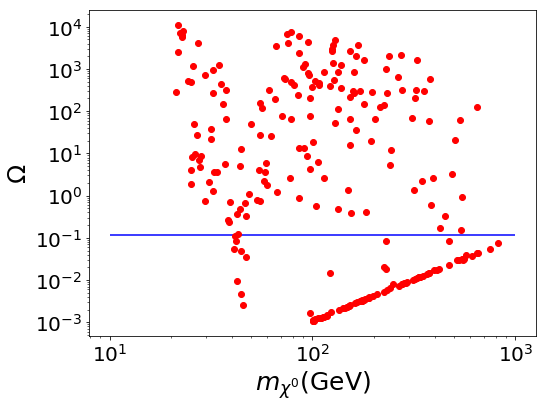

In [23]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mChi1,xd.Omega,'ro')
plt.hlines(Omega,10,1e3, 'b',label=r'0.11')

#plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\Omega$',size=25)
#plt.xlim(10,5e3)
#plt.ylim(11.2e-2,1.3e-1)

plt.show()

cuts

In [24]:
x1 = xd[np.logical_and(np.abs(xd.mChi1 -xd.mChi2)<20., 1>0)]
x2 = xd[np.logical_and(np.abs(xd.mChi1 -xd.mChi2)>200., 1>0)]

Maximun values: Some elements tend to be small

In [32]:
print(np.abs(xd.YRB11).max(),np.abs(xd.YRB12).max(),np.abs(xd.YRB13).max())
print(np.abs(xd.YRB21).max(),np.abs(xd.YRB22).max(),np.abs(xd.YRB23).max())

0.001293436494148477 0.0035754592404710116 0.0032083841460740672
0.0006982424946785817 0.0006619214318543954 0.0009216377509440731


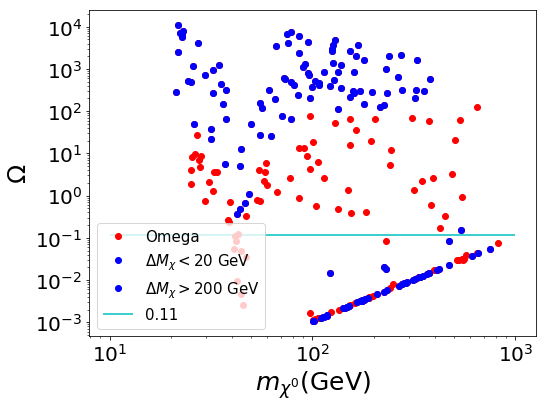

In [34]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mChi1,xd.Omega,'ro')
plt.loglog(x1.mChi1,x1.Omega,'bo',label=r'$\Delta M_{\chi} < 20$ GeV')
plt.loglog(x2.mChi1,x2.Omega,'bo',label=r'$\Delta M_{\chi} > 200$ GeV')
plt.hlines(Omega,10,1e3, 'c',label=r'0.11')

plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\Omega$',size=25)

plt.show()

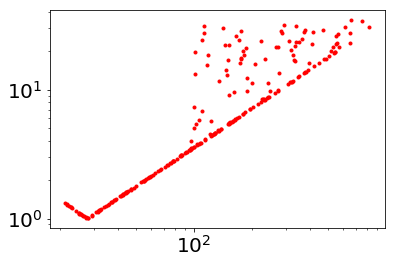

In [35]:
plt.loglog(xd.mChi1,xd.mh2/xd.mh1,'r.')

In [39]:
xDM1 = xd[np.logical_and(xd.Omega>Omega_max, 1>0)]

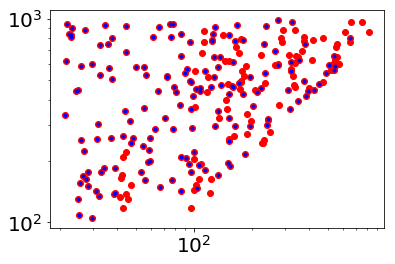

In [41]:
plt.loglog(xd.mChi1, xd.mChi2,'ro')
plt.loglog(xDM1.mChi1, xDM1.mChi2,'b.')

plt.show()